Muhammad Haidar Izzuddin

Dicoding Proyek Akhir Machine Learning untuk Pemula

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#menpersiapkan data yang akan dipakai

!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-04 16:16:27--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.58MB/s    in 68s     

2021-05-04 16:17:36 (4.51 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#melakukan ekstraksi file pada zip
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
#mengeset nama direktori dan membuat direktori untuk memisahkan data antara train dan validation
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')

os.mkdir(train_dir)
os.mkdir(val_dir)

In [5]:
#menentukan path direktori untuk setiap rock, paper, dan scissors
r_dir = os.path.join(base_dir,'rock')
p_dir = os.path.join(base_dir,'paper')
s_dir = os.path.join(base_dir,'scissors')

In [6]:
#data masing-masing kelas (rock, paper, scissors) dibagi menjadi train dan validation data, dengan validation 40% sesuai dengan arahan
from sklearn.model_selection import train_test_split
train_r_dir, val_r_dir = train_test_split(os.listdir(r_dir), test_size=0.4)
train_p_dir, val_p_dir = train_test_split(os.listdir(p_dir), test_size=0.4)
train_s_dir, val_s_dir = train_test_split(os.listdir(s_dir), test_size=0.4)

In [7]:
#menentukan path direktori pada masing-masing kelas (path untuk train dan validation)
train_r = os.path.join(train_dir,'rock')
train_p = os.path.join(train_dir,'paper')
train_s = os.path.join(train_dir,'scissors')
val_r = os.path.join(val_dir,'rock')
val_p = os.path.join(val_dir,'paper')
val_s = os.path.join(val_dir,'scissors')

In [8]:
# membuat direktori baru di dalam direktori train dan validation untuk setiap kelas
if not os.path.exists(train_r):
  os.mkdir(train_r)
if not os.path.exists(train_p):
  os.mkdir(train_p)
if not os.path.exists(train_s):
  os.mkdir(train_s)
if not os.path.exists(val_r):
  os.mkdir(val_r)
if not os.path.exists(val_p):
  os.mkdir(val_p)
if not os.path.exists(val_s):
  os.mkdir(val_s)

In [9]:
#menyalin data ke direktori baru yang dibuat di line sebelum ini
import shutil
for i in train_r_dir:
  shutil.copy(os.path.join(r_dir,i), os.path.join(train_r, i))
for i in train_p_dir:
  shutil.copy(os.path.join(p_dir,i), os.path.join(train_p,i))
for i in train_s_dir:
  shutil.copy(os.path.join(s_dir,i), os.path.join(train_s,i))
for i in val_r_dir:
  shutil.copy(os.path.join(r_dir,i), os.path.join(val_r,i))
for i in val_p_dir:
  shutil.copy(os.path.join(p_dir,i), os.path.join(val_p,i))
for i in val_s_dir:
  shutil.copy(os.path.join(s_dir,i), os.path.join(val_s,i))

In [10]:
#melihat struktur data yang sudah dibuat di line-line sebelumnya
os.listdir('/tmp/rockpaperscissors/train')

['scissors', 'rock', 'paper']

In [11]:
#melihat struktur data yang sudah dibuat di line-line sebelumnya
os.listdir('/tmp/rockpaperscissors/val')

['scissors', 'rock', 'paper']

In [12]:
#melihat isi setiap kelas pada data train dan data validation
print('train rock: %d' %(len(os.listdir('/tmp/rockpaperscissors/train/rock'))))
print('val rock: %d' %(len(os.listdir('/tmp/rockpaperscissors/val/rock'))))
print('train scissors: %d' %(len(os.listdir('/tmp/rockpaperscissors/train/scissors'))))
print('val scissors: %d' %(len(os.listdir('/tmp/rockpaperscissors/val/scissors'))))
print('train paper: %d' %(len(os.listdir('/tmp/rockpaperscissors/train/paper'))))
print('val paper: %d' %(len(os.listdir('/tmp/rockpaperscissors/val/paper'))))

train rock: 435
val rock: 291
train scissors: 450
val scissors: 300
train paper: 427
val paper: 285


In [13]:
#menginisialisasi image data generator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [14]:
#mempersiapkan data latih yang akan dipelajari model
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), 
        batch_size=32,
        class_mode='categorical')
        #karena kelas yang digunakan lebih dari 2
validation_generator = test_datagen.flow_from_directory(
        val_dir, 
        target_size=(150, 150), 
        batch_size=32,
        class_mode='categorical')
        #karena kelas yang digunakan lebih dari 2

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [15]:
#membangun model dengan arsitektur CNN
model = tf.keras.models.Sequential([
    #first convulation
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second convulation
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third convulation
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth convulation
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    #hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [16]:
#mengcompile model dengan optimizer bernama 'Adam' dan loss_function 'categorigal_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [19]:
#melatih model menggunakan model.fit
hist = model.fit(
          train_generator,
          steps_per_epoch=25,  
          epochs=20, 
          validation_data=validation_generator, 
          validation_steps=5, 
          verbose=2)

Epoch 1/20
25/25 - 45s - loss: 0.0459 - accuracy: 0.9875 - val_loss: 0.0953 - val_accuracy: 0.9812
Epoch 2/20
25/25 - 44s - loss: 0.1083 - accuracy: 0.9688 - val_loss: 0.0828 - val_accuracy: 0.9688
Epoch 3/20
25/25 - 45s - loss: 0.0969 - accuracy: 0.9625 - val_loss: 0.0793 - val_accuracy: 0.9812
Epoch 4/20
25/25 - 44s - loss: 0.0625 - accuracy: 0.9825 - val_loss: 0.0711 - val_accuracy: 0.9750
Epoch 5/20
25/25 - 44s - loss: 0.0631 - accuracy: 0.9825 - val_loss: 0.0390 - val_accuracy: 0.9875
Epoch 6/20
25/25 - 44s - loss: 0.0645 - accuracy: 0.9825 - val_loss: 0.0238 - val_accuracy: 0.9937
Epoch 7/20
25/25 - 45s - loss: 0.0853 - accuracy: 0.9787 - val_loss: 0.0322 - val_accuracy: 0.9937
Epoch 8/20
25/25 - 45s - loss: 0.0852 - accuracy: 0.9762 - val_loss: 0.0590 - val_accuracy: 0.9812
Epoch 9/20
25/25 - 44s - loss: 0.0520 - accuracy: 0.9850 - val_loss: 0.0375 - val_accuracy: 0.9875
Epoch 10/20
25/25 - 45s - loss: 0.0495 - accuracy: 0.9862 - val_loss: 0.0548 - val_accuracy: 0.9875
Epoch 11/

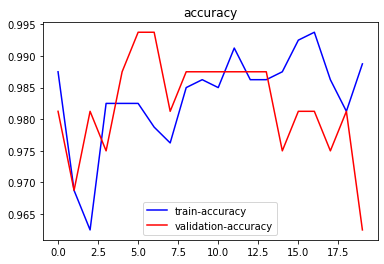

<Figure size 432x288 with 0 Axes>

In [22]:
#memvisualisasikan akurasi menggunakan matplotlib
import matplotlib.pyplot as plt

loss = hist.history['loss']
acc = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_acc = hist.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='train-accuracy')
plt.plot(epochs, val_acc, 'r', label='validation-accuracy')
plt.title('accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving paper.png to paper.png
paper.png
[[1. 0. 0.]]
kertas


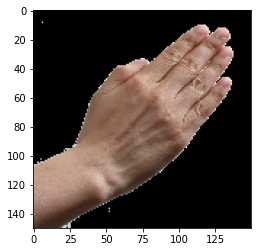

In [25]:
#membuat line interaktif untuk memprediksi gambar yang dimasukkan
from google.colab import files
import numpy as np
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  #prediksi image
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  #output = np.argmax(classes)

  print(fn)
  print(classes)
  if classes[0][0]==1:
    print('kertas')
  elif classes[0][1]==1:
    print('batu')
  elif classes[0][2]==1:
    print('gunting')
  else:
    print('not sure')